# Monty Hall

In [5]:
from sys import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
path.append("../")

from src.utils import first_choice, eliminate_a_loser

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# preallocate variables
n_trials = 1000
Winners = np.zeros(n_trials)
Stay = np.zeros(n_trials)
Won = np.zeros(n_trials)

# Initial bets
doors = np.array([1, 2, 3])

In [ ]:
# loop through trials 
for n in range(n_trials):
    winner = np.random.randint(np.min(doors), np.max(doors)+1)
    Winners[n] = winner

    first_pick = np.random.randint(np.min(doors), np.max(doors)+1)
    #print(f"First picked is {first_pick}")

    second_set = first_choice(first_pick, doors)
    remaining_doors, eliminated_door = eliminate_a_loser(second_set, winner)
    #print(f"Door #{eliminated_door} has been eliminated")
    #print(f"Second option is door #{remaining_doors}")
    #print(f"psssst, the winner is {winner}")

    final_choice = np.random.choice([0, 1])
    if final_choice == 0:
        Stay[n] = 1
        Won[n] = (first_pick == winner)
    else:
        Stay[n] = 0
        Won[n] = (remaining_doors == winner)
        

   door  proportion
0     1    0.331425
1     2    0.335120
2     3    0.333455


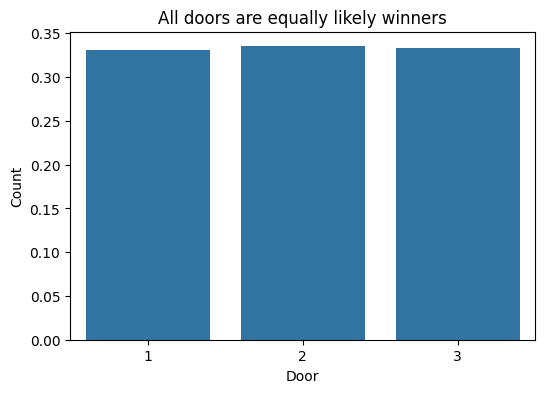

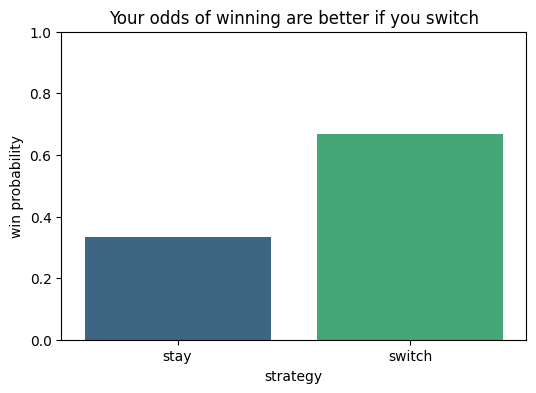

In [19]:
# Vectorized implementation - faster and easier

n = 200000
winners = np.random.randint(1, 4, size=n)
first_picks = np.random.randint(1, 4, size=n)

# Compute stay/switch wins
stay_wins = winners == first_picks
switch_wins = winners != first_picks

# add to dataframe for plotting
df_winProb = (
    pd.Series(winners, name='door')
              .value_counts(normalize=True)
              .sort_index()
              .reset_index(name='proportion')
              )
print(df_winProb)
df_strat = pd.DataFrame({
    'win' : np.concatenate([stay_wins, switch_wins]),
    'strategy' : ['stay']*n + ['switch']*n
})


# plot odds of any door being the winner door
plt.figure(figsize=(6,4))
sns.barplot(x='door', y='proportion', data=df_winProb, order=[1,2,3], color='C0')
plt.title("All doors are equally likely winners")
plt.ylabel("Count")
plt.xlabel("Door")
plt.show()

# plot strategy odds for winning
plt.figure(figsize=(6,4))
sns.barplot(x='strategy', y='win', data=df_strat, errorbar=None, palette='viridis', hue='strategy', legend=None)
plt.title("Your odds of winning are better if you switch")
plt.ylabel("win probability")
plt.ylim(0,1)
plt.show()